In [ ]:
!unzip "/content/archive.zip"

Archive:  /content/archive.zip
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: Brain Tumor D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
ROOT_DIR='/content/Brain Tumor Data Set/Brain Tumor Data Set'
no_of_img={}
for dir in os.listdir(ROOT_DIR):
  no_of_img[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

In [ ]:
no_of_img.items()

dict_items([('Brain Tumor', 2513), ('Healthy', 2087)])

In [ ]:
def data_split(path,split):
  if not os.path.exists(f'./{path}'):
    os.mkdir(f'./{path}')

    for dir in os.listdir(ROOT_DIR):
      os.makedirs(os.path.join(f'./{path}',dir))

      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),size=(math.floor(split*no_of_img[dir])),replace=False):
        o=os.path.join(ROOT_DIR,dir,img)
        d=os.path.join(f'./{path}',dir)
        shutil.copy(o,d)
        os.remove(o)
        # img_list=os.listdir('./train')
  else:
    print(f"{path} folder already exist")


In [ ]:
#train
data_split('train',0.7)

In [ ]:
#test
data_split('test',0.15)

In [ ]:
#validation
data_split("validation",0.15)

In [ ]:
no_of_img={}
for dir in os.listdir(os.path.join(ROOT_DIR)):
  no_of_img[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))
no_of_img.items()

dict_items([('Brain Tumor', 2), ('Healthy', 1)])

## Custom MODEL BUILDING

In [ ]:
#cnn model
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding="same",input_shape=(224,224,3)))
model.add(Conv2D(36,kernel_size=(3,3),activation='relu',padding="same"))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding="same"))
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64,activation='relu',))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 224, 224, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1605632)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │   102,760,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,862,949 (392.39 MB)

 Trainable params: 102,862,949 (392.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### **Preprocessing data to train the model**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

In [ ]:
def preprocessing_data1(path):
  image_data=ImageDataGenerator(
      rescale=1/255,
      rotation_range=0.2,
      zoom_range=0.2,
      preprocessing_function=preprocess_input,
      horizontal_flip=True,
  )
  image=image_data.flow_from_directory(
      directory=path,
      target_size=(224,224),
      batch_size=32,
      class_mode='binary',
  )
  return image

In [ ]:
train_data=preprocessing_data1('/content/train')

Found 3219 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

In [ ]:
def preprocessing_data2(path):
  image_data=ImageDataGenerator(
      rescale=1/255,      preprocessing_function=preprocess_input,
  )
  image=image_data.flow_from_directory(
      directory=path,
      target_size=(224,224),
      batch_size=32,
      class_mode='binary',
  )
  return image

In [ ]:
test_data=preprocessing_data2('/content/test')
validation_data=preprocessing_data2('/content/validation')

Found 689 images belonging to 2 classes.
Found 689 images belonging to 2 classes.


In [ ]:
er=EarlyStopping(
    monitor='val_loss',
    min_delta=0.01,
    patience=6,
    mode='auto',
    verbose=1,
)
mc=ModelCheckpoint(
    filepath="./best_model.keras",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True
)
cbs=[er,mc]

In [ ]:
h=model.fit(train_data,steps_per_epoch=8,epochs=30,validation_data=validation_data,validation_steps=8,callbacks=cbs)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26s/step - accuracy: 0.4517 - loss: 9.7631  
Epoch 1: val_accuracy improved from -inf to 0.52734, saving model to ./best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 281s 36s/step - accuracy: 0.4553 - loss: 9.3872 - val_accuracy: 0.5273 - val_loss: 0.6917
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26s/step - accuracy: 0.5124 - loss: 0.6960 
Epoch 2: val_accuracy did not improve from 0.52734
8/8 ━━━━━━━━━━━━━━━━━━━━ 309s 40s/step - accuracy: 0.5115 - loss: 0.6972 - val_accuracy: 0.4766 - val_loss: 0.6901
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27s/step - accuracy: 0.5356 - loss: 0.6975 
Epoch 3: val_accuracy improved from 0.52734 to 0.59766, saving model to ./best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 345s 45s/step - accuracy: 0.5399 - loss: 0.6971 - val_accuracy: 0.5977 - val_loss: 0.6894
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - accuracy: 0.5273 - loss: 0.6911 
Epoch 4: val_accuracy did not improve from 0.59766
8/8 ━━━━━━━━━━━━━━━━━━━━ 299s 39s/step - 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 13: val_accuracy did not improve from 0.74609
8/8 ━━━━━━━━━━━━━━━━━━━━ 182s 22s/step - accuracy: 0.7091 - loss: 0.5477 - val_accuracy: 0.6797 - val_loss: 0.5892
Epoch 14/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27s/step - accuracy: 0.6896 - loss: 0.6027 
Epoch 14: val_accuracy did not improve from 0.74609
8/8 ━━━━━━━━━━━━━━━━━━━━ 322s 41s/step - accuracy: 0.6863 - loss: 0.6048 - val_accuracy: 0.7461 - val_loss: 0.5634
Epoch 15/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24s/step - accuracy: 0.6959 - loss: 0.6138 
Epoch 15: val_accuracy did not improve from 0.74609
8/8 ━━━━━━━━━━━━━━━━━━━━ 261s 34s/step - accuracy: 0.6922 - loss: 0.6146 - val_accuracy: 0.5938 - val_loss: 0.6160
Epoch 16/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27s/step - accuracy: 0.7043 - loss: 0.5668 
Epoch 16: val_accuracy did not improve from 0.74609
8/8 ━━━━━━━━━━━━━━━━━━━━ 272s 35s/step - accuracy: 0.7033 - loss: 0.5680 - val_accuracy: 0.6758 - val_loss: 0.5858
Epoch 17/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - accuracy: 0.6748 - loss: 0.5

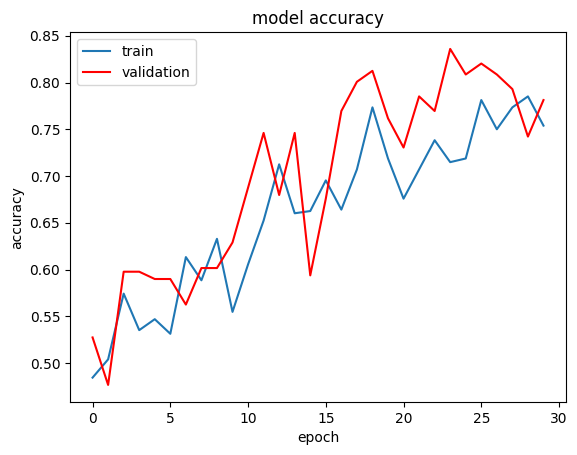

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'],c='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

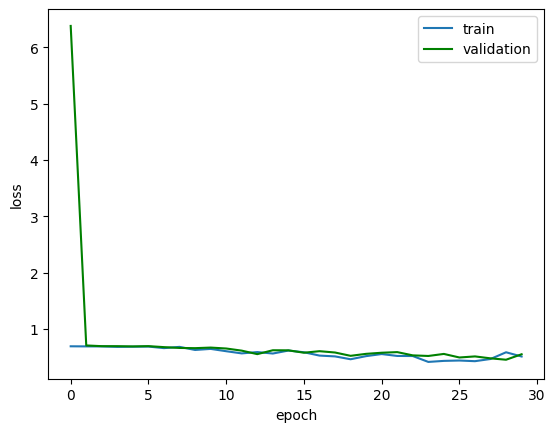

In [ ]:
plt.plot(h.history['val_loss'])
plt.plot(h.history['loss'],c='green')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])

In [ ]:
acc=model.evaluate(test_data)[1]
print(f"The accuracy of the model is {acc*100}%")

22/22 ━━━━━━━━━━━━━━━━━━━━ 152s 7s/step - accuracy: 0.8245 - loss: 0.4573
The accuracy of the model is 80.84179759025574%


In [ ]:
#laoding best_model
from tensorflow.keras.models import load_model
bestm=load_model('/content/Main_usingCustomCNN.keras')

In [ ]:
acc2=bestm.evaluate(test_data)[1]
print(f"The accuracy of the Main model is {acc2*100}%")

22/22 ━━━━━━━━━━━━━━━━━━━━ 153s 7s/step - accuracy: 0.8162 - loss: 0.4692
The accuracy of the Main model is 80.84179759025574%


## **Model building Using Transfer learning**

In [ ]:
import numpy as np
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras.applications import MobileNetV3Small,MobileNetV3Large,VGG16

In [ ]:
base_model=VGG16(weights="imagenet",input_shape=(224,224,3),include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layers in base_model.layers:
  layers.trainable=False

In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:

# Input layer
inputs = Input(shape=(224, 224, 3))

# Pass through base model
x = base_model(inputs, training=False)  # Important: training=False to prevent updating BN layers if frozen
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x=Dropout(0.25)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Define the model
model2 = Model(inputs=inputs, outputs=outputs)

In [ ]:
model2.summary()

Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,322,497 (62.27 MB)

 Trainable params: 1,607,809 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
his=model2.fit(train_data,steps_per_epoch=8,epochs=30,validation_data=validation_data,validation_steps=8,callbacks=cbs)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.5098 - loss: 1.0588 
Epoch 1: val_accuracy improved from -inf to 0.62891, saving model to ./best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 272s 36s/step - accuracy: 0.5103 - loss: 1.0531 - val_accuracy: 0.6289 - val_loss: 0.6269
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.6406 - loss: 0.6165 
Epoch 2: val_accuracy improved from 0.62891 to 0.69531, saving model to ./best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 324s 44s/step - accuracy: 0.6415 - loss: 0.6158 - val_accuracy: 0.6953 - val_loss: 0.5332
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.7463 - loss: 0.4586 
Epoch 3: val_accuracy improved from 0.69531 to 0.84375, saving model to ./best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 319s 43s/step - accuracy: 0.7476 - loss: 0.4593 - val_accuracy: 0.8438 - val_loss: 0.3801
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.8034 - loss: 0.4426 
Epoch 4: val_accuracy improved from 0.84375 to 0.8554

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 13: val_accuracy did not improve from 0.91406
8/8 ━━━━━━━━━━━━━━━━━━━━ 262s 35s/step - accuracy: 0.9076 - loss: 0.2508 - val_accuracy: 0.8945 - val_loss: 0.2444
Epoch 14/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.9094 - loss: 0.2358 
Epoch 14: val_accuracy improved from 0.91406 to 0.92578, saving model to ./best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 322s 43s/step - accuracy: 0.9103 - loss: 0.2364 - val_accuracy: 0.9258 - val_loss: 0.2151
Epoch 15/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.9008 - loss: 0.2316 
Epoch 15: val_accuracy did not improve from 0.92578
8/8 ━━━━━━━━━━━━━━━━━━━━ 322s 44s/step - accuracy: 0.9005 - loss: 0.2321 - val_accuracy: 0.8906 - val_loss: 0.2257
Epoch 16/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.8980 - loss: 0.2365 
Epoch 16: val_accuracy did not improve from 0.92578
8/8 ━━━━━━━━━━━━━━━━━━━━ 322s 44s/step - accuracy: 0.8976 - loss: 0.2362 - val_accuracy: 0.9180 - val_loss: 0.2238
Epoch 17/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s

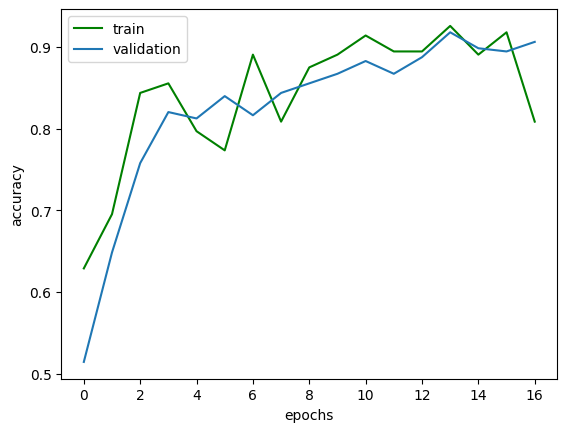

In [ ]:
plt.plot(his.history['val_accuracy'],c="green")
plt.plot(his.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'])

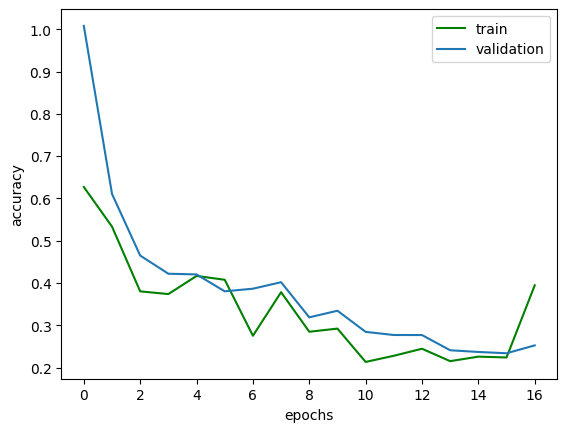

In [ ]:
plt.plot(his.history['val_loss'],c="green")
plt.plot(his.history['loss'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'])

In [ ]:
ac=model2.evaluate(test_data)[1]
print(f"The accuracy of the model made using transfer learning is {ac*100}%")

22/22 ━━━━━━━━━━━━━━━━━━━━ 376s 17s/step - accuracy: 0.7889 - loss: 0.4409
The accuracy of the model made using transfer learning is 80.40638566017151%


In [ ]:
model_m=load_model('best_model.keras')

In [ ]:
acM=model_m.evaluate(test_data)[1]
print(f"The accuracy of the MAIN model made using transfer learning is {acM*100}%")

22/22 ━━━━━━━━━━━━━━━━━━━━ 372s 17s/step - accuracy: 0.9129 - loss: 0.2344
The accuracy of the MAIN model made using transfer learning is 90.27576446533203%


In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import cv2

In [ ]:
path="/content/test/Brain Tumor/Cancer (1).jpg"
image=load_img(path)
image_arr=img_to_array(image)
image_arr=cv2.resize(image_arr,(224,224))
image_arr=image_arr.reshape(1,224,224,3)

pred=model_m.predict(image_arr)

if pred==1:
  print("The person is healthy")
else:
  print("The person has brain tumor")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
The person has brain tumor


In [ ]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

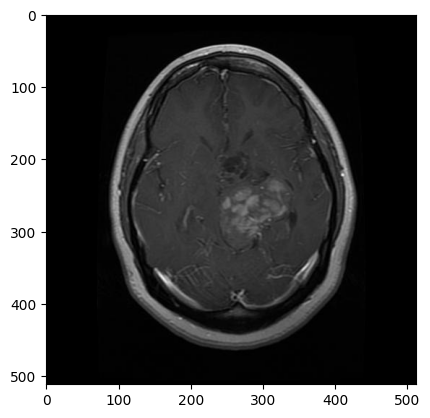

In [ ]:
plt.imshow(image)